# Compare formula for airmass calculation

- author Sylvie Dagoret-Campagne
- creation date Wed 28 October 2016


In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline

/Users/dagoret-campagnesylvie/.local/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from astropy import units as u
from astropy import constants as const
from astropy.coordinates import EarthLocation,AltAz

lsst=EarthLocation.of_site('Cerro Pachon')
LSST_Longitude,LSST_Latitude,LSST_Altitude=lsst.to_geodetic()

In [3]:
LSST_Longitude = -70.7366833333333*u.deg
LSST_Latitude = -30.240741666666672*u.deg
LSST_Altitude = 2749.999999999238*u.m

In [4]:
AltAz(location=lsst)

<AltAz Frame (obstime=None, location=(1820193.0684460278, -5208343.034275673, -3194842.5004834323) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0, obswl=1.0 micron)>

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## defines zenith angles in degrees

In [6]:
za=np.linspace(0,71,100)*u.deg

In [7]:
print za

[  0.           0.71717172   1.43434343   2.15151515   2.86868687
   3.58585859   4.3030303    5.02020202   5.73737374   6.45454545
   7.17171717   7.88888889   8.60606061   9.32323232  10.04040404
  10.75757576  11.47474747  12.19191919  12.90909091  13.62626263
  14.34343434  15.06060606  15.77777778  16.49494949  17.21212121
  17.92929293  18.64646465  19.36363636  20.08080808  20.7979798
  21.51515152  22.23232323  22.94949495  23.66666667  24.38383838
  25.1010101   25.81818182  26.53535354  27.25252525  27.96969697
  28.68686869  29.4040404   30.12121212  30.83838384  31.55555556
  32.27272727  32.98989899  33.70707071  34.42424242  35.14141414
  35.85858586  36.57575758  37.29292929  38.01010101  38.72727273
  39.44444444  40.16161616  40.87878788  41.5959596   42.31313131
  43.03030303  43.74747475  44.46464646  45.18181818  45.8989899
  46.61616162  47.33333333  48.05050505  48.76767677  49.48484848
  50.2020202   50.91919192  51.63636364  52.35353535  53.07070707
  53.7878787

## Airmass Parallel plane

- Simple Secant
----
$
Z= \frac{1}{\cos \theta}
$
----

In [8]:
def Airmass_PP_SecZ(za):
    return 1/np.cos(za)

## Airmass Young- Irvine
----
$
Z = \sec \theta \left(1-0.0012(\sec^2 \theta -1) \right)
$
----

In [9]:
def Airmass_PP_YoungIrvine1967(za):
    SecTh=Airmass_PP_SecZ(za)
    Z=SecTh*(1.-0.0012*(SecTh**2-1.))
    return Z

## Airmass Hardie
----
$
  Z = \sec \theta -0.0018167(\sec\theta -1)-0.002875(\sec\theta -1)^2-0.0008083()(\sec\theta -1)^3
$
----

In [10]:
def Airmass_PP_Hardie1962(za):
    SecTh=Airmass_PP_SecZ(za)
    X=SecTh-1
    Z=SecTh-0.0018167*X-0.002875*X**2-0.0008083*X**3
    return Z

## Airmass Rozenberg
----
$
Z=\frac{1}{\cos \theta +0.025\exp(-11\cdot\cos \theta)}
$
----

In [11]:
def Airmass_PP_Rozenberg1966(za):
    CosTh=np.cos(za)
    X=np.exp(-11*CosTh)
    Z=1/(CosTh+0.025*X)
    return Z

## Airmass Kasten and Young (1989) 

------
$
Z=\frac{1}{\cos \theta +0.50572(6.0799^o+90^o-\theta)^{-1.6364}}
$
---

In [12]:
def Airmass_PP_KastenYoung1989(za):
    CosTh=np.cos(za)
    X=6.0799*u.deg+90*u.deg-za
    Y=X/u.deg
    Z=1/(CosTh+0.50572*np.power(Y,1.6364))
    return Z

## Airmass Young(1989)

----
$
Z=\frac{1.002432\cos^2 \theta + 0.148386 \cos \theta +0.0096467 }{\cos^3 \theta +0.149864 \cos^2 \theta+ 0.0102963\cos \theta+0.000303978}
$
----

In [13]:
def Airmass_PP_Young1994(za):
    CosTh=np.cos(za)
    N= 1.002432*CosTh**2 + 0.148386*CosTh +0.0096467 
    D= CosTh**3 +0.149864*CosTh**2+ 0.0102963*CosTh+0.000303978
    Z=N/D
    return Z

In [14]:
Z1=Airmass_PP_SecZ(za)
Z2=Airmass_PP_YoungIrvine1967(za)
Z3=Airmass_PP_Hardie1962(za)
Z4=Airmass_PP_Rozenberg1966(za)
Z5=Airmass_PP_KastenYoung1989(za)
Z6=Airmass_PP_Young1994(za)

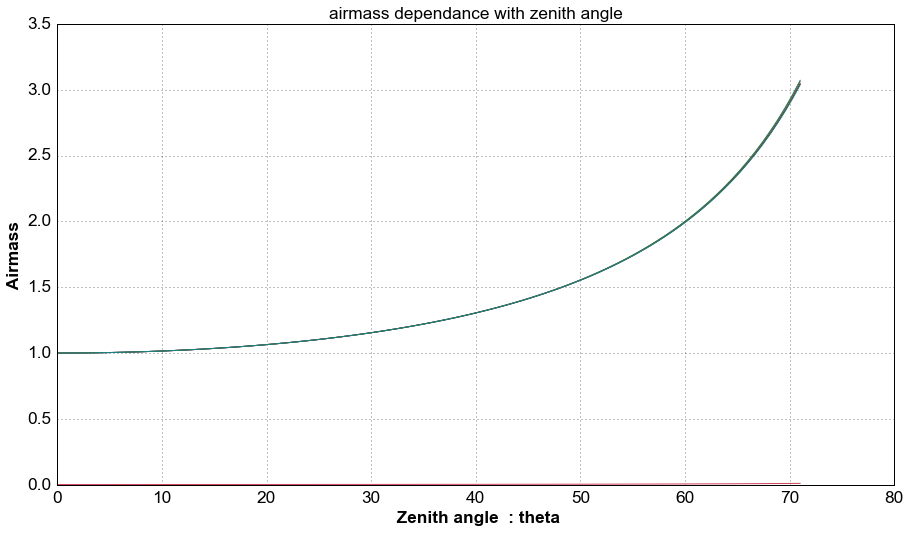

In [15]:
plt.figure(figsize=(15,8))
plt.plot(za,Z1)
plt.plot(za,Z2)
plt.plot(za,Z3)
plt.plot(za,Z4)
plt.plot(za,Z5)
plt.plot(za,Z6)
plt.xlabel(' Zenith angle  : theta')
plt.ylabel(' Airmass ')
plt.title('airmass dependance with zenith angle')